In [1]:
import numpy as np                  ## Imports Python's numerical library
import matplotlib.pyplot as plt     ## Imports matplotlib for plotting
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [73]:
#At y = 0 and z = 0

#Lorentzian describing laser frequency's closeness to resonance
L = 1

#Mass of atom in the trap
m = 1
i = j = 200
B = 1
k = 1

#Each x and vx value represents an initial condition

x = np.linspace(-100,100,i)

vx = np.linspace(-15,15,j)

trap = np.zeros([i,j])
#position = np.zeros(i)
#y = np.zeros(i)

#time between discretized calculations
t = 0.05

#For each set of initial conditions, will the particle remain trapped?
for i in range(0,len(x)):
    pos = x[i]
    for j in range(0,len(vx)):
        vel = vx[j]
        for num in range(0,5):  
            a = -L*(B*pos+k*vel)/m 
            if abs(pos)<10:
                pos += vel*t+a*t**2/2
                vel += a*t
                #position[num] = pos
                #y[num] = 0
            else:
                pos += vel*t
                vel += a*t
                #position[num] = pos
                #y[num] = 0
        if abs(pos)< 10:
            trap[i][j] = 1
        else:
            trap[i][j] = 0


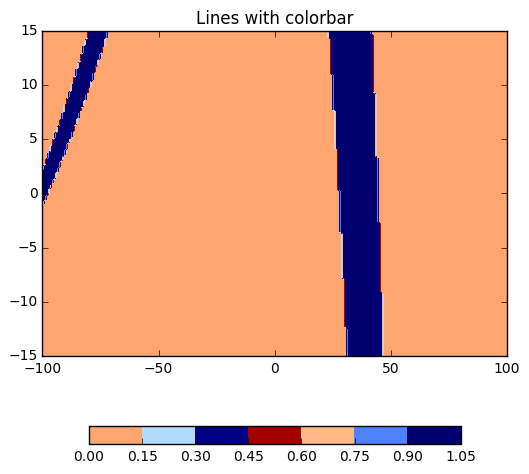

In [74]:
plt.figure(figsize=(6, 6))
CS = plt.contourf(x,vx,trap)

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar( orientation='horizontal', shrink=0.8)


IndexError: arrays used as indices must be of integer (or boolean) type

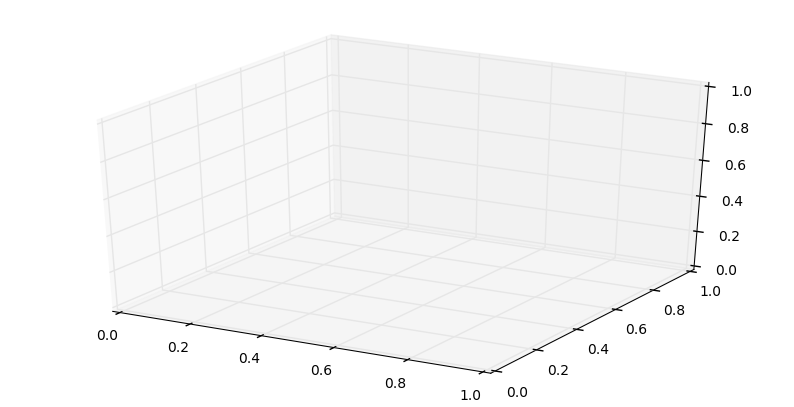

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, vx, trap[x][vx],cmap=cm.coolwarm,linewidth=0, antialiased=True)
#ax.text2D(0.05, 0.95, transform=ax.transAxes)
ax.text2D(1, .80, "Potential Strength (arb. units)", transform=ax.transAxes)
ax.set_zlim(0, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential (arb. units)')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
# Generate grid for plotting

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-10,10), ylim=(-1,1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(position, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames = 100, interval=20, blit=True)

plt.show()

anim.save('animation.mp4')